In [55]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import DEG UP & DOWN data 

In [56]:
deg_na = pd.read_csv('11_identify_DEG/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='n_vs_a')
deg_nr = pd.read_csv('11_identify_DEG/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='n_vs_r')
deg_ar = pd.read_csv('11_identify_DEG/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='a_vs_r')

In [57]:
# drop rows that contains NaN in the padj column 
deg_na = deg_na.dropna(subset=['padj'])
deg_nr = deg_nr.dropna(subset=['padj'])
deg_ar = deg_ar.dropna(subset=['padj'])


In [58]:

# filter for NaN in log2FoldChange column 
deg_na = deg_na.dropna(subset=['log2FoldChange'])
deg_nr = deg_nr.dropna(subset=['log2FoldChange'])
deg_ar = deg_ar.dropna(subset=['log2FoldChange'])

# Split UP & DOWN regulated genes 

In [59]:
# split dataframe by log2FoldChange column. positive values are upregulated, negative values are downregulated
deg_na_up = deg_na[(deg_na['log2FoldChange'] > 0) & (deg_na['padj'] <= 0.05)]
deg_na_down = deg_na[(deg_na['log2FoldChange'] <= 0) & (deg_na['padj'] <= 0.05)]
deg_nr_up = deg_nr[(deg_nr['log2FoldChange'] > 0) & (deg_nr['padj'] <= 0.05)]
deg_nr_down = deg_nr[(deg_nr['log2FoldChange'] <= 0) & (deg_nr['padj'] <= 0.05)]
deg_ar_up = deg_ar[(deg_ar['log2FoldChange'] > 0) & (deg_ar['padj'] <= 0.05)]
deg_ar_down = deg_ar[(deg_ar['log2FoldChange'] <= 0) & (deg_ar['padj'] <= 0.05)]


print('deg_na_up:', len(deg_na_up))
print('deg_na_down:', len(deg_na_down))
print('total:', len(deg_na_up) + len(deg_na_down))
print('deg_na:', len(deg_na[(deg_na['padj'] <= 0.05)]))
print('deg_nr_up:', len(deg_nr_up))
print('deg_nr_down:', len(deg_nr_down))
print('total:', len(deg_nr_up) + len(deg_nr_down))
print('deg_nr:', len(deg_nr[(deg_nr['padj'] <= 0.05)]))
print('deg_ar_up:', len(deg_ar_up))
print('deg_ar_down:', len(deg_ar_down))
print('total:', len(deg_ar_up) + len(deg_ar_down))
print('deg_ar:', len(deg_ar[(deg_ar['padj'] <= 0.05)]))

deg_na_up: 720
deg_na_down: 545
total: 1265
deg_na: 1265
deg_nr_up: 394
deg_nr_down: 186
total: 580
deg_nr: 580
deg_ar_up: 317
deg_ar_down: 145
total: 462
deg_ar: 462


# Create dict for PLOT

In [60]:
# create a dict with the names of the dataframes as keys and the len(dataframe) as value 
# all *_up dataframes should have a positive value in the dict len(dataframe)
# this is used to create a barplot
dict_len = {'deg_na_up': len(deg_na_up), 'deg_na_down': -len(deg_na_down), 'deg_nr_up': len(deg_nr_up), 'deg_nr_down': -len(deg_nr_down), 'deg_ar_up': len(deg_ar_up), 'deg_ar_down': -len(deg_ar_down)}

In [61]:
dict_len    

{'deg_na_up': 720,
 'deg_na_down': -545,
 'deg_nr_up': 394,
 'deg_nr_down': -186,
 'deg_ar_up': 317,
 'deg_ar_down': -145}

# PLOT

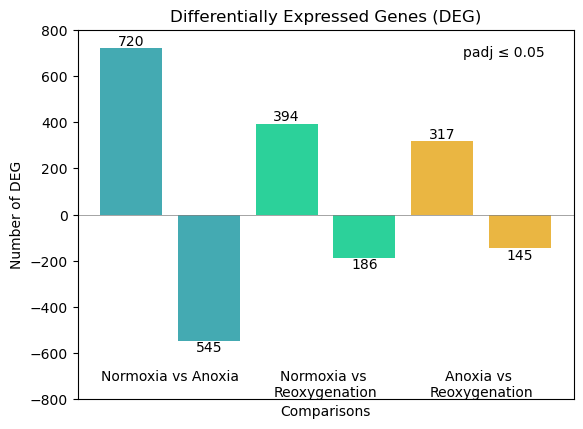

In [62]:

# Sample data
categories = dict_len.keys()
values = dict_len.values()

# Create a bar plot
plt.bar(categories, values, color='skyblue')
plt.title("Differentially Expressed Genes (DEG)")
plt.xlabel("Comparisons")
plt.ylabel("Number of DEG")


# Add labels to the bars
for i, value in enumerate(values):
    if i %2==0:
        plt.text(i, value + 1, str(abs(value)), ha='center', va='bottom', color='black')
    else:
        plt.text(i, value - 1, str(abs(value)), ha='center', va='top', color='black')

# change the color of the bars (first two: blue, second two: red, third two: green)
plt.bar(range(len(dict_len)), list(dict_len.values()), align='center', color=['#44AAB2', '#44AAB2', '#2CD19A', '#2CD19A', '#EAB642', '#EAB642' ])

# extand the y scale from -500 to +700
plt.ylim(-800, 800)

# remove x scale
plt.xticks([])

# add a label in the center of the first two bars 
plt.text(0.5, -700, 'Normoxia vs Anoxia', ha='center', va='center', color='black')
plt.text(2.5, -700, 'Normoxia vs ', ha='center', va='center', color='black')
plt.text(2.5, -770, 'Reoxygenation', ha='center', va='center', color='black')
plt.text(4.5, -700, 'Anoxia vs ', ha='center', va='center', color='black')
plt.text(4.5, -770, 'Reoxygenation', ha='center', va='center', color='black')

# add a 0 line 
# the line should be slim and grey
plt.axhline(y=0, color='grey', linestyle='-', linewidth=0.5)

# add a lable in the top right corner of the plot
plt.text(4.8, 700, 'padj ≤ 0.05', ha='center', va='center', color='black')

# Save the figure as a high-quality image (e.g., PNG or PDF)
plt.savefig('11_identify_DEG/DEG_barplot.png', dpi=300, bbox_inches='tight')
plt.savefig('11_identify_DEG/DEG_barplot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('11_identify_DEG/DEG_barplot.tiff', format='tiff', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


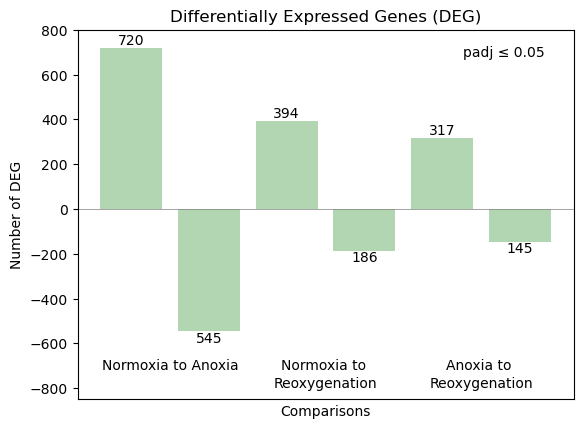

In [63]:

# Sample data
categories = dict_len.keys()
values = dict_len.values()

# Create a bar plot
plt.bar(categories, values, color='skyblue')
plt.title("Differentially Expressed Genes (DEG)")
plt.xlabel("Comparisons")
plt.ylabel("Number of DEG")


# Add labels to the bars
for i, value in enumerate(values):
    if i %2==0:
        plt.text(i, value + 1, str(abs(value)), ha='center', va='bottom', color='black')
    else:
        plt.text(i, value - 1, str(abs(value)), ha='center', va='top', color='black')

# change the color of the bars (first two: blue, second two: red, third two: green)
plt.bar(range(len(dict_len)), list(dict_len.values()), align='center', color='#B2D6B1')

# extand the y scale from -500 to +700
plt.ylim(-850, 800)

# remove x scale
plt.xticks([])

# add a label in the center of the first two bars 
plt.text(0.5, -700, 'Normoxia to Anoxia', ha='center', va='center', color='black')
plt.text(2.5, -700, 'Normoxia to ', ha='center', va='center', color='black')
plt.text(2.5, -780, 'Reoxygenation', ha='center', va='center', color='black')
plt.text(4.5, -700, 'Anoxia to ', ha='center', va='center', color='black')
plt.text(4.5, -780, 'Reoxygenation', ha='center', va='center', color='black')

# add a 0 line 
# the line should be slim and grey
plt.axhline(y=0, color='grey', linestyle='-', linewidth=0.5)

# add a lable in the top right corner of the plot
plt.text(4.8, 700, 'padj ≤ 0.05', ha='center', va='center', color='black')

# Save the figure as a high-quality image (e.g., PNG or PDF)
plt.savefig('11_identify_DEG/DEG_barplot.png', dpi=500, bbox_inches='tight')
plt.savefig('11_identify_DEG/DEG_barplot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('11_identify_DEG/DEG_barplot.tiff', format='tiff', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


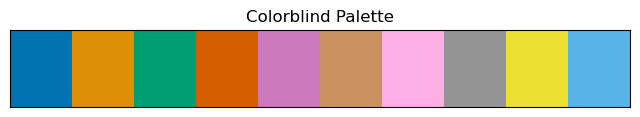

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn to the colorblind theme
sns.set_palette("colorblind")

# Get all colors in the colorblind palette
colorblind_palette = sns.color_palette("colorblind")

# Create a bar plot to display the colors
fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([colorblind_palette], aspect='auto', extent=(0, len(colorblind_palette), 0, 1))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Colorblind Palette')

plt.show()



# Export DEG UP & DOWN as dataframes (to corralte with DMR)

In [65]:
# export deg as dataframe  
deg_na = deg_na.loc[deg_na['padj'] <= 0.05]
deg_nr = deg_nr.loc[deg_nr['padj'] <= 0.05]
deg_ar = deg_ar.loc[deg_ar['padj'] <= 0.05]
deg_na.to_csv('11_identify_DEG/deg_na.txt', index=False) 
deg_nr.to_csv('11_identify_DEG/deg_nr.txt', index=False)
deg_ar.to_csv('11_identify_DEG/deg_ar.txt', index=False)


In [66]:
print(len(deg_na))
print(len(deg_nr))
print(len(deg_ar))


1265
580
462


In [67]:
deg_na['Unnamed: 0']

15                            ccar_ub01-g23276
50                            ccar_ub01-g23341
51                            ccar_ub01-g23342
93                            ccar_ub01-g23394
115                           ccar_ub01-g23418
                         ...                  
40044                         ccar_ub25-g45370
40065                         ccar_ub25-g45391
40200                       scaffold_35-g45673
40228                       scaffold_44-g45718
40248    scaffold_59-g45739_scaffold_59-g45740
Name: Unnamed: 0, Length: 1265, dtype: object

# Match DEG with GO terms 

In [68]:
# Geneid to GO term
goterm = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/DNAseq_pipeline/9_DMR_functional_annotation/gene_id_goterms_df_fullgenome.tsv', sep='\t', header=None, names=['gene_id', 'goterm', 'chromosome'])
# GO term to description
godesc = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/DNAseq_pipeline/9_DMR_functional_annotation/goterm_desc_ref.tsv', sep='\t', header=None, names=['biofunction', 'goterm', 'description'])

In [69]:
# filter for genes in correlation data for the goterm df 
gotermNA = goterm[goterm['gene_id'].isin(deg_na['Unnamed: 0'])]
gotermNR = goterm[goterm['gene_id'].isin(deg_nr['Unnamed: 0'])]
gotermAR = goterm[goterm['gene_id'].isin(deg_ar['Unnamed: 0'])]

print(gotermNA)
print(gotermNR)
print(gotermAR)

Empty DataFrame
Columns: [gene_id, goterm, chromosome]
Index: []
Empty DataFrame
Columns: [gene_id, goterm, chromosome]
Index: []
Empty DataFrame
Columns: [gene_id, goterm, chromosome]
Index: []


In [70]:
gotermNA

,gene_id,goterm,chromosome


In [71]:
godesc

,biofunction,goterm,description
0,MOLECULAR_FUNCTION,GO:0000009,"alpha-1,6-mannosyltransferase activity"
1,BIOLOGICAL_PROCESS,GO:0000012,single strand break repair
2,CELLULAR_COMPONENT,GO:0000015,phosphopyruvate hydratase complex
3,BIOLOGICAL_PROCESS,GO:0000027,ribosomal large subunit assembly
4,MOLECULAR_FUNCTION,GO:0000030,mannosyltransferase activity
...,...,...,...
3198,BIOLOGICAL_PROCESS,GO:2000969,positive regulation of AMPA receptor activity
3199,BIOLOGICAL_PROCESS,GO:2001033,negative regulation of double-strand break rep...
3200,MOLECULAR_FUNCTION,GO:2001070,starch binding
3201,BIOLOGICAL_PROCESS,GO:2001222,regulation of neuron migration


In [72]:
# merge goterm and godesc on goterm
gotermNA = pd.merge(gotermNA, godesc, on='goterm')
gotermNR = pd.merge(gotermNR, godesc, on='goterm')
gotermAR = pd.merge(gotermAR, godesc, on='goterm')
